In [296]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [297]:
plt.rcParams['font.family'] = 'Malgun Gothic'

## 8-10월 데이터 시간별로 이용자수 평균 내기

In [298]:
aug=pd.read_csv("aug_final.csv")
sept=pd.read_csv("sept_final.csv")
oct=pd.read_csv("oct_final.csv")
oct

,정류장,합계,04,05,06,07,08,09,10,11,...,주변_편의시설_개수,월,이용자유형,노선,위도,경도,주변_장애인시설_개수,geometry,지역구,주거_장애인_수
0,가락시장,16307,57,269,388,641,716,812,1066,1114,...,20.0000,10,장애인,3,37.4922,127.1178,0.0000,POINT (127.117757 37.492245),송파구,20571
1,강동구청,9210,4,327,437,622,859,630,638,576,...,33.0000,10,장애인,8,37.5303,127.1205,1.0000,POINT (127.120508 37.530341),송파구,20571
2,개롱,7553,7,126,205,386,672,646,615,482,...,23.0000,10,장애인,5,37.4981,127.1348,0.0000,POINT (127.13482 37.498079),송파구,20571
3,거여,10910,0,509,457,861,1189,845,807,729,...,18.0000,10,장애인,5,37.4931,127.1441,3.0000,POINT (127.14415 37.493105),송파구,20571
4,경찰병원,5626,1,101,151,405,385,425,417,501,...,22.0000,10,장애인,3,37.4959,127.1245,0.0000,POINT (127.12454 37.495918),송파구,20571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,충정로(경기대입구),11155,1,308,402,434,653,632,615,945,...,18.0000,10,장애인,2,37.5597,126.9644,2.0000,POINT (126.964378 37.559704),서대문구,12348
237,홍제,18801,5,585,771,1526,1676,1496,1597,1417,...,48.0000,10,장애인,3,37.5891,126.9437,0.0000,POINT (126.943736 37.589066),서대문구,12348
238,미아(서울사이버대학),19043,3,876,892,1186,1493,1471,1373,1375,...,64.0000,10,장애인,4,37.6267,127.0260,4.0000,POINT (127.025983 37.62667),강북구,17186
239,미아사거리,30693,3,1118,1556,2290,2453,2458,2392,2313,...,31.0000,10,장애인,4,37.6133,127.0301,0.0000,POINT (127.030053 37.613292),강북구,17186


In [299]:
sept.isna().sum()

정류장            0
합계             0
04             0
05             0
06             0
07             0
08             0
09             0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
00             0
01             0
02             0
호선_개수          0
주변_편의시설_개수     0
월              0
이용자유형          0
노선             0
위도             0
경도             0
주변_장애인시설_개수    0
geometry       0
지역구            0
dtype: int64

In [300]:
df1 = pd.concat([aug,sept], axis=0)
df1.reset_index(drop=True,inplace=True)

df2 = pd.concat([df1,oct], axis=0)
df2.reset_index(drop=True,inplace=True)

df2

,정류장,합계,04,05,06,07,08,09,10,11,...,주변_편의시설_개수,월,이용자유형,노선,위도,경도,주변_장애인시설_개수,geometry,지역구,주거_장애인_수
0,가락시장,15118,48,310,469,604,754,770,1023,1104,...,20.0000,8,장애인,3,37.4922,127.1178,0.0000,POINT (127.117757 37.492245),송파구,20571.0000
1,강동구청,8585,11,323,419,603,884,620,544,496,...,33.0000,8,장애인,8,37.5303,127.1205,1.0000,POINT (127.120508 37.530341),송파구,20571.0000
2,개롱,7049,1,133,238,410,635,547,482,438,...,23.0000,8,장애인,5,37.4981,127.1348,0.0000,POINT (127.13482 37.498079),송파구,20571.0000
3,거여,10204,0,476,473,869,1106,728,684,628,...,18.0000,8,장애인,5,37.4931,127.1441,3.0000,POINT (127.14415 37.493105),송파구,20571.0000
4,경찰병원,5616,1,94,182,366,373,432,450,512,...,22.0000,8,장애인,3,37.4959,127.1245,0.0000,POINT (127.12454 37.495918),송파구,20571.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,충정로(경기대입구),11155,1,308,402,434,653,632,615,945,...,18.0000,10,장애인,2,37.5597,126.9644,2.0000,POINT (126.964378 37.559704),서대문구,12348.0000
719,홍제,18801,5,585,771,1526,1676,1496,1597,1417,...,48.0000,10,장애인,3,37.5891,126.9437,0.0000,POINT (126.943736 37.589066),서대문구,12348.0000
720,미아(서울사이버대학),19043,3,876,892,1186,1493,1471,1373,1375,...,64.0000,10,장애인,4,37.6267,127.0260,4.0000,POINT (127.025983 37.62667),강북구,17186.0000
721,미아사거리,30693,3,1118,1556,2290,2453,2458,2392,2313,...,31.0000,10,장애인,4,37.6133,127.0301,0.0000,POINT (127.030053 37.613292),강북구,17186.0000


In [301]:
df2.columns

Index(['정류장', '합계', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01',
       '02', '03', '호선_개수', '주변_편의시설_개수', '월', '이용자유형', '노선', '위도', '경도',
       '주변_장애인시설_개수', 'geometry', '지역구', '주거_장애인_수'],
      dtype='object')

In [302]:
average = df2.groupby('정류장').agg({'합계':'mean',
                                        '04': 'mean',
                                        '05': 'mean',
                                        '06': 'mean',
                                        '07': 'mean',
                                        '08': 'mean',
                                        '09': 'mean',
                                        '10': 'mean',
                                        '11': 'mean',
                                        '12': 'mean',
                                        '13': 'mean',
                                        '14': 'mean',
                                        '15': 'mean',
                                        '16': 'mean',
                                        '17': 'mean',
                                        '18': 'mean',
                                        '19': 'mean',
                                        '20': 'mean',
                                        '21': 'mean',
                                        '22': 'mean',
                                        '23': 'mean',
                                        '00': 'mean',
                                        '01': 'mean',
                                        '02': 'mean',
                                        '03': 'mean',
                                        #'호선_개수': 'first',
                                        #'주변_편의시설_개수': 'first',
                                        #'월': 'first',
                                        #'이용자유형': 'first',
                                        #'노선': 'first',
                                        #'위도':'first',
                                        #'경도':'first',
                                        #'주변_장애인시설_개수': 'first',
                                 #'지역구':'first',
                                  #'주거_장애인_수':'first'
                                 }).reset_index()
average

,정류장,합계,04,05,06,07,08,09,10,11,...,18,19,20,21,22,23,00,01,02,03
0,가락시장,15965.3333,52.3333,276.0000,411.3333,639.3333,741.0000,780.6667,1068.3333,1137.0000,...,1215.0000,677.3333,478.3333,400.0000,341.0000,145.3333,24.6667,0.0000,0.0000,0.0000
1,가산디지털단지,20360.6667,28.6667,175.0000,287.3333,480.3333,405.6667,503.0000,678.6667,849.3333,...,3203.3333,1305.3333,883.3333,555.3333,367.3333,106.0000,14.3333,0.3333,0.0000,0.0000
2,가양,33476.0000,38.0000,1591.6667,1454.3333,2391.6667,3239.0000,3115.0000,2765.0000,2510.3333,...,1498.0000,743.0000,532.6667,347.0000,243.3333,107.3333,12.6667,0.0000,0.0000,0.0000
3,강남,24286.0000,6.0000,239.0000,577.3333,506.6667,618.0000,653.0000,1051.0000,1237.6667,...,2192.3333,1311.3333,1076.6667,1099.6667,749.0000,305.0000,65.0000,0.3333,0.0000,0.0000
4,강남구청,6330.6667,2.0000,112.3333,182.3333,223.0000,191.3333,262.6667,325.3333,295.0000,...,689.0000,321.0000,289.3333,245.6667,138.3333,50.3333,8.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,화곡,24281.3333,7.3333,1254.6667,1317.6667,2033.3333,2437.3333,1910.3333,1926.0000,1904.3333,...,1112.0000,667.6667,509.0000,349.0000,229.0000,83.6667,9.6667,0.0000,0.0000,0.0000
237,화랑대(서울여대입구),7325.3333,11.0000,269.6667,476.6667,767.6667,871.0000,661.6667,476.0000,415.0000,...,244.3333,115.6667,99.6667,104.0000,36.6667,20.3333,5.3333,0.0000,0.0000,0.0000
238,회현(남대문시장),20416.3333,5.6667,75.0000,96.6667,231.3333,325.0000,451.6667,707.0000,1144.3333,...,1807.6667,727.6667,604.0000,279.0000,176.6667,66.3333,5.3333,0.0000,0.0000,0.0000
239,효창공원앞,5752.6667,0.0000,86.6667,231.6667,542.0000,544.6667,407.0000,349.0000,372.3333,...,303.0000,184.0000,139.6667,119.6667,64.0000,20.6667,2.6667,0.0000,0.0000,0.0000


## 상위 5개 역 시간 대 이용자 수 붙이기

In [303]:
top5=average.nlargest(5, '합계')
top5

,정류장,합계,04,05,06,07,08,09,10,11,...,18,19,20,21,22,23,00,01,02,03
206,종로3가,60391.3333,17.6667,365.3333,408.3333,580.0000,871.6667,1404.3333,2381.0000,3292.6667,...,5941.3333,3898.3333,2673.0000,2249.6667,1512.6667,637.6667,63.3333,0.0000,0.0000,0.0000
121,서울역,46606.0000,90.0000,708.3333,791.6667,1643.3333,2237.6667,2176.6667,2662.0000,3351.3333,...,4212.3333,2440.3333,1815.6667,1613.6667,1069.0000,437.6667,36.3333,0.0000,0.0000,0.0000
197,잠실(송파구청),43524.0000,4.3333,543.0000,1030.3333,1229.3333,1641.6667,1646.6667,1891.0000,2423.0000,...,3794.3333,2588.6667,2149.3333,1793.3333,1189.6667,327.6667,56.0000,0.0000,0.0000,0.0000
18,고속터미널,41887.0000,7.0000,654.0000,518.3333,912.3333,1261.0000,1892.6667,2023.6667,2436.3333,...,3468.0000,2492.3333,2256.3333,1533.3333,971.3333,329.6667,24.0000,0.3333,0.0000,0.0000
64,동대문,39923.0000,46.6667,420.0000,495.0000,766.6667,1177.6667,1614.0000,2427.0000,2890.3333,...,2542.0000,1563.0000,1052.0000,828.0000,658.0000,265.0000,40.0000,0.0000,0.0000,0.0000


In [304]:
top5.set_index('정류장', inplace=True)
#top5

In [305]:
종로3가=top5.loc[['종로3가']]

In [306]:
def newdf(df):
    df=df.drop(['합계'],axis=1)
    time=df.columns
    df=df.T
    df['시간'] = time
    df.columns=['이용자수_평균','시간']
    
    return df

In [307]:
종로3가=newdf(종로3가)


In [308]:
종로3가

,이용자수_평균,시간
04,17.6667,04
05,365.3333,05
06,408.3333,06
07,580.0000,07
08,871.6667,08
09,1404.3333,09
10,2381.0000,10
11,3292.6667,11
12,4737.3333,12
13,5006.0000,13


In [309]:
서울역=top5.loc[['서울역']]
서울역
서울역=newdf(서울역)
서울역

,이용자수_평균,시간
04,90.0000,04
05,708.3333,05
06,791.6667,06
07,1643.3333,07
08,2237.6667,08
09,2176.6667,09
10,2662.0000,10
11,3351.3333,11
12,3481.0000,12
13,3289.3333,13


In [310]:
서울역

,이용자수_평균,시간
04,90.0000,04
05,708.3333,05
06,791.6667,06
07,1643.3333,07
08,2237.6667,08
09,2176.6667,09
10,2662.0000,10
11,3351.3333,11
12,3481.0000,12
13,3289.3333,13


In [311]:
잠실=top5.loc[['잠실(송파구청)']]
잠실
잠실=newdf(잠실)
잠실

,이용자수_평균,시간
04,4.3333,04
05,543.0000,05
06,1030.3333,06
07,1229.3333,07
08,1641.6667,08
09,1646.6667,09
10,1891.0000,10
11,2423.0000,11
12,2539.6667,12
13,2758.6667,13


In [312]:
고속터미널=top5.loc[['고속터미널']]
고속터미널
고속터미널=newdf(고속터미널)

In [313]:
동대문=top5.loc[['동대문']]
동대문=newdf(동대문)
동대문

,이용자수_평균,시간
04,46.6667,04
05,420.0000,05
06,495.0000,06
07,766.6667,07
08,1177.6667,08
09,1614.0000,09
10,2427.0000,10
11,2890.3333,11
12,3284.6667,12
13,3895.6667,13


## 종로 3가 시계열 분석 및 예측

In [314]:
종로3가

,이용자수_평균,시간
04,17.6667,04
05,365.3333,05
06,408.3333,06
07,580.0000,07
08,871.6667,08
09,1404.3333,09
10,2381.0000,10
11,3292.6667,11
12,4737.3333,12
13,5006.0000,13


In [315]:
def draw(df):
    plt.figure(figsize=(10, 6))
    # 시계열 데이터 그래프 그리기
    plt.plot(df['시간'],df['이용자수_평균'], label='이용자수_평균', color='blue')
    # 그래프 제목과 축 레이블 설정
    plt.title('시계열 그래프')
    plt.xlabel('시간')
    plt.ylabel('이용자수_평균')
    # 범례 표시
    plt.legend()
    # 그래프 표시
    plt.show()

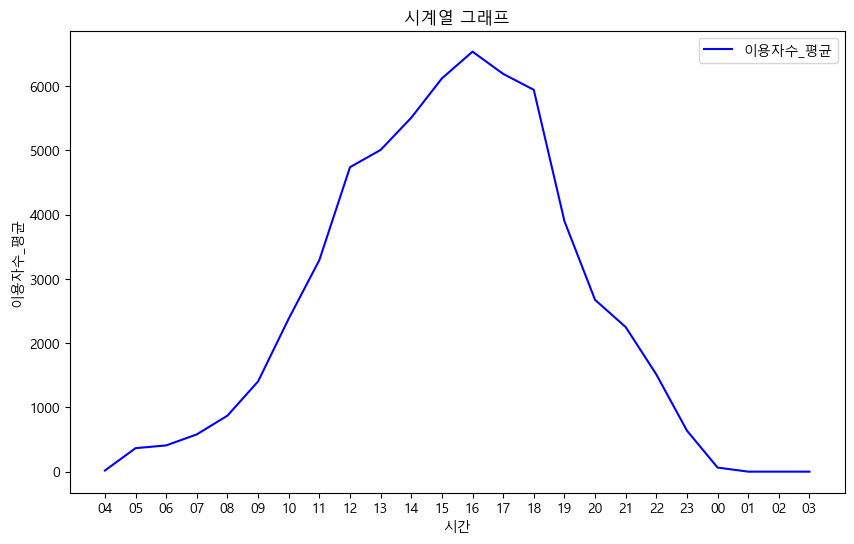

In [316]:
draw(종로3가)

In [317]:
# 정상성 확인
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.이용자수_평균)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(종로3가)

ADF TEST 결과
ADF Statistics: -1.337096
p-value: 0.612035
num of lags: 8.000000
num of observations: 15.000000
Critical values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


=> 0.05보다 크므로 정상성을 만족하지 않는다는 귀무가설을 기각할 수 없다., 따라서 비정상데이터임. 

In [318]:
종로3가.index = 종로3가['시간']
종로3가.set_index('시간', inplace=True)

<AxesSubplot:xlabel='시간'>

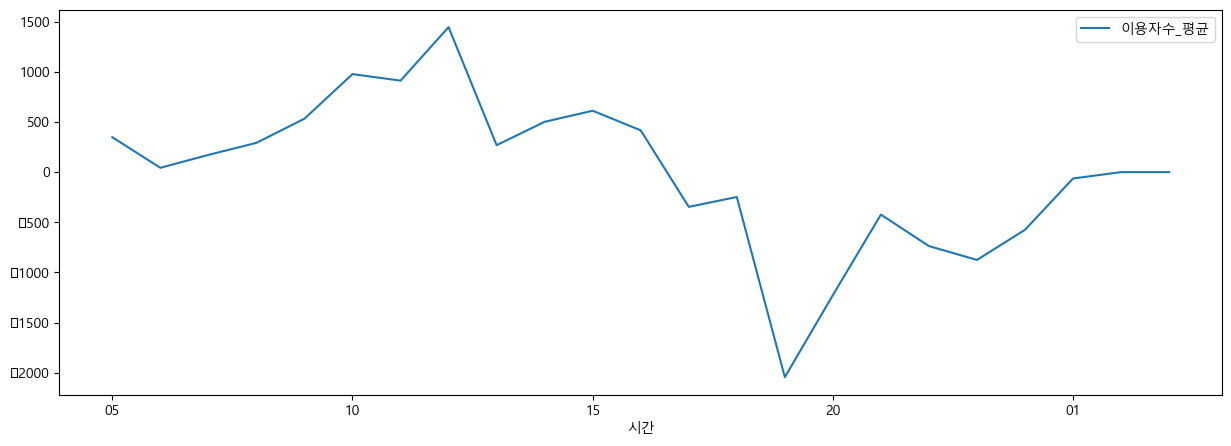

In [319]:
# 1차 차분 데이터 diff1
dff1_종로3가 = 종로3가.diff().dropna()
dff1_종로3가.plot(figsize=(15,5))

In [320]:
#2차 차분 뒤 ADF Test 결과
print('ADF TEST 결과')
adf_test(dff1_종로3가)

ADF TEST 결과
ADF Statistics: -1.912318
p-value: 0.326289
num of lags: 0.000000
num of observations: 22.000000
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


<AxesSubplot:xlabel='시간'>

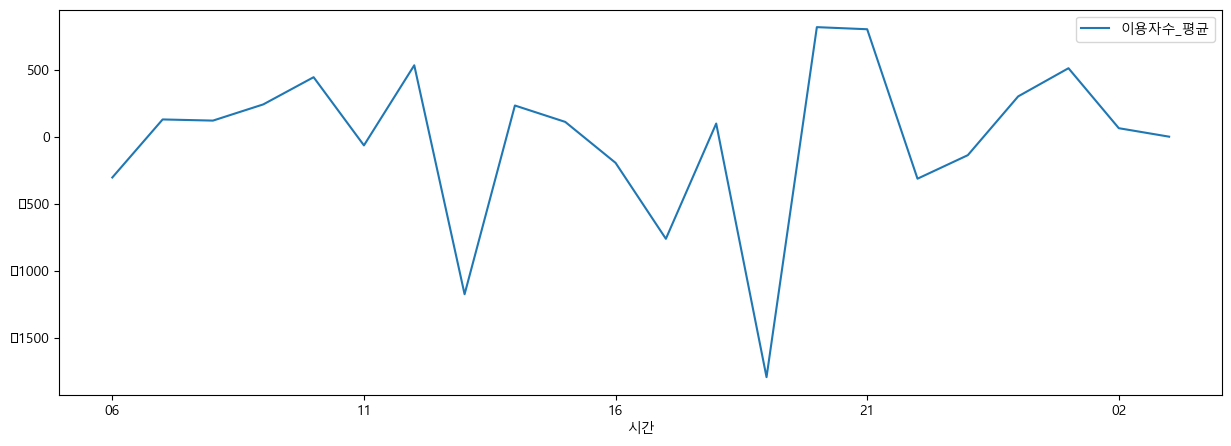

In [321]:
dff2_종로3가 = dff1_종로3가.diff().dropna()
dff2_종로3가.plot(figsize=(15,5))

In [322]:
#2차 차분 뒤 ADF Test 결과
print('ADF TEST 결과')
adf_test(dff2_종로3가)

ADF TEST 결과
ADF Statistics: -5.575693
p-value: 0.000001
num of lags: 0.000000
num of observations: 21.000000
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


pvalue가 0.05보다 작으므로 정상성 만족

In [323]:
import pmdarima as pm
from pmdarima.arima import ndiffs

model1 = pm.auto_arima(
            y=종로3가.이용자수_평균, 
            d=2, 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=347.412, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=348.135, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=347.926, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=345.427, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=349.905, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.158 seconds


In [324]:
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -171.714
Date:                Fri, 24 Nov 2023   AIC                            345.427
Time:                        02:34:05   BIC                            346.518
Sample:                             0   HQIC                           345.684
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.522e+05   7.48e+04      4.705      0.000    2.05e+05    4.99e+05
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 9.62
Prob(Q):                              0.24   Pr

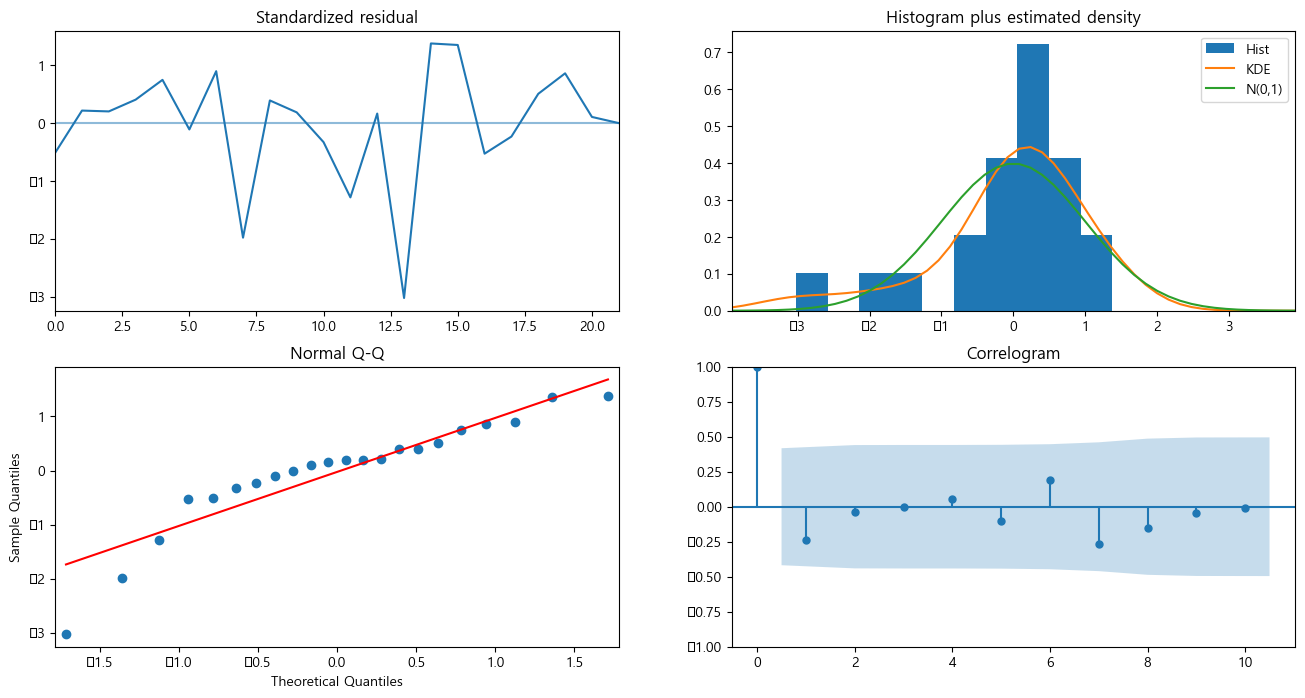

In [325]:
model1.plot_diagnostics(figsize=(16,8))
plt.show()

In [326]:
from statsmodels.tsa.arima_model import ARIMA

model1_fit = pm.auto_arima(
    	    y=종로3가.이용자수_평균, 
 	        d=2 , 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model1_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=347.412, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=348.135, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=347.926, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=345.427, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=349.905, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.116 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -171.714
Date:                Fri, 24 Nov 2023   AIC                            345.427
Time:                        02:34:06   BIC                            346.518
Sample:                             0   HQIC                           345.684
                                 - 24                                         
Co

In [327]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

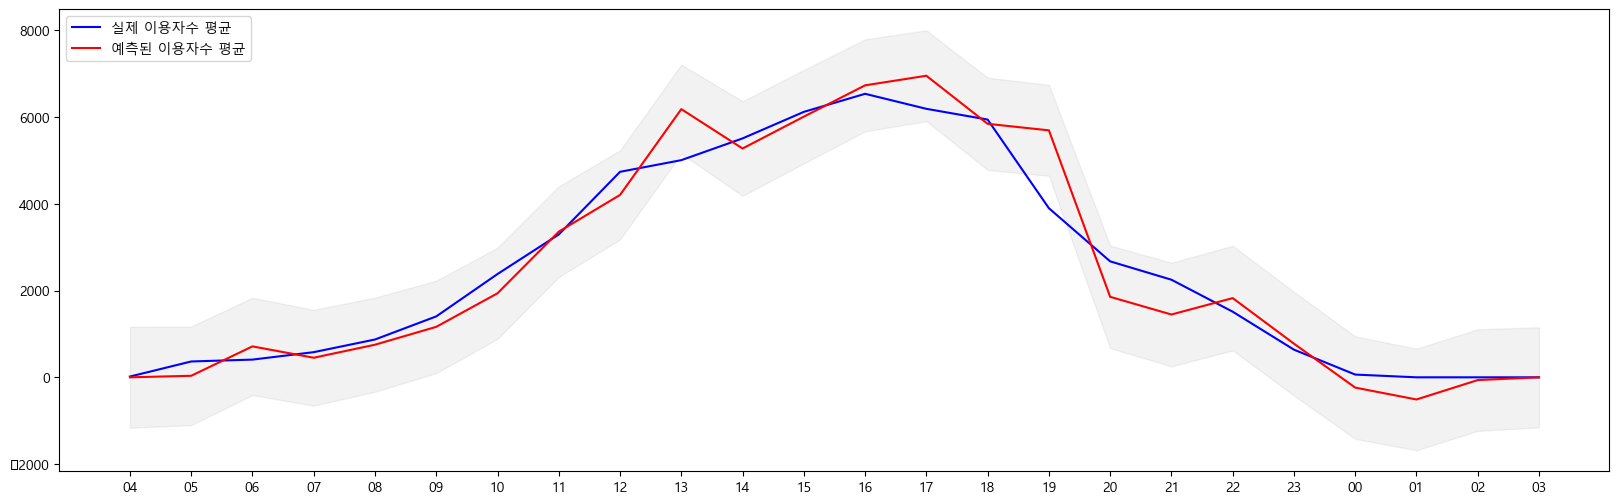

In [328]:
# Forecast 
fc, upper, lower = forecast(len(종로3가), model1_fit, 종로3가.index, data = 종로3가.이용자수_평균)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=종로3가.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=종로3가.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(종로3가, c='b', label='실제 이용자수 평균')
plt.plot(fc, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()


In [329]:
fc

시간
04     -0.0000
05     35.3333
06    713.0000
07    451.3333
08    751.6667
09   1163.3333
10   1937.0000
11   3357.6667
12   4204.3333
13   6182.0000
14   5274.6667
15   6008.6667
16   6730.6667
17   6951.6667
18   5843.3333
19   5693.3333
20   1855.3333
21   1447.6667
22   1826.3333
23    775.6667
00   -237.3333
01   -511.0000
02    -63.3333
03      0.0000
dtype: float64

In [330]:
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_종로3가= pd.DataFrame({'이용자수예측':fc}, index=fc.index)
prediction_종로3가
prediction_종로3가['비율'] = prediction_종로3가['이용자수예측'] / prediction_종로3가['이용자수예측'].sum()
prediction_종로3가

,이용자수예측,비율
시간,,
04,-0.0000,-0.0000
05,35.3333,0.0006
06,713.0000,0.0118
07,451.3333,0.0075
08,751.6667,0.0124
09,1163.3333,0.0193
10,1937.0000,0.0321
11,3357.6667,0.0556
12,4204.3333,0.0696


In [331]:
def pred(fc):
    pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
    prediction_종로3가= pd.DataFrame({'이용자수예측':fc}, index=fc.index)
    prediction_종로3가
    prediction_종로3가['비율'] = prediction_종로3가['이용자수예측'] / prediction_종로3가['이용자수예측'].sum()
    return prediction_종로3가

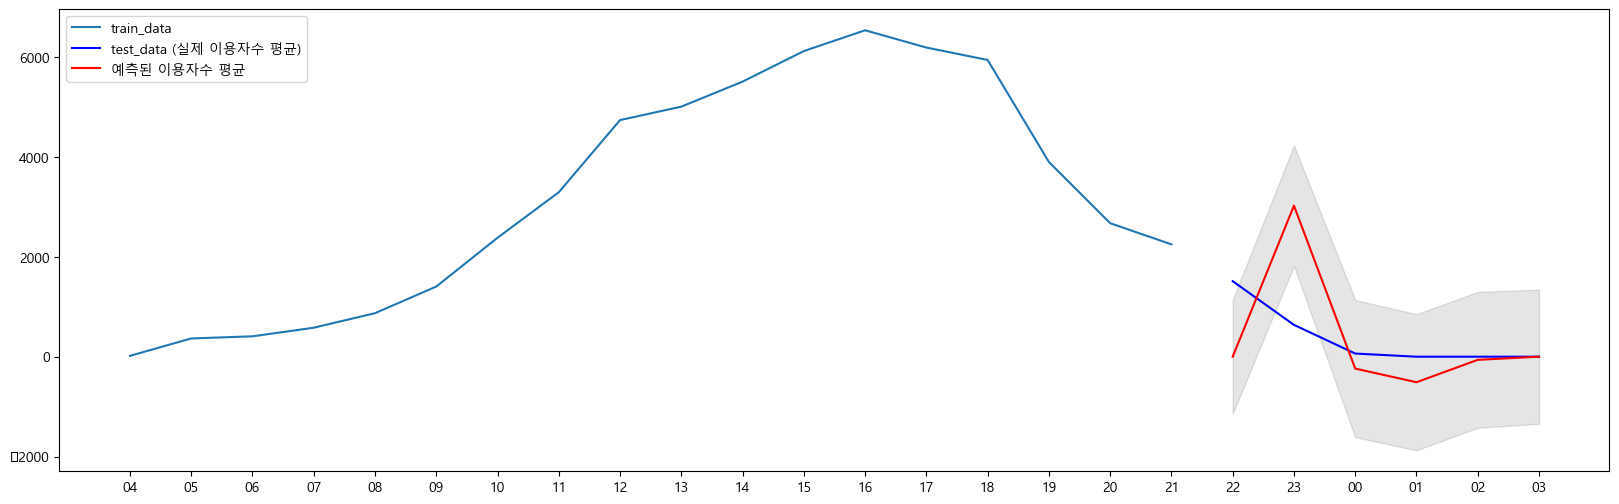

In [332]:
# Forecast 
fc, upper, lower = forecast(len(test1), model1_fit, test1.index, data = test1.이용자수_평균)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=test1.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test1.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(train1, label='train_data')
plt.plot(test1, c='b', label='test_data (실제 이용자수 평균)')
plt.plot(fc, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()


### 서울역 시계열 예측

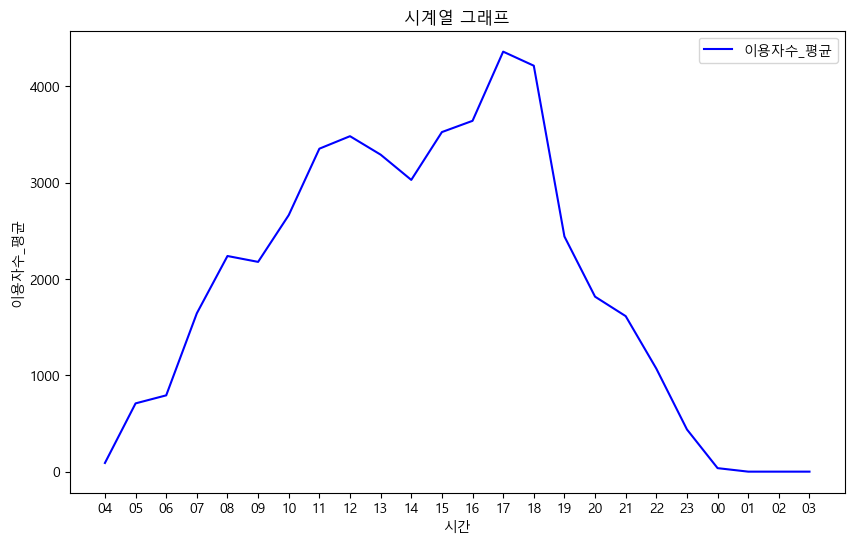

In [333]:
draw(서울역)


In [334]:
print('ADF TEST 결과')
adf_test(서울역)
서울역.index = 서울역['시간']
서울역.set_index('시간', inplace=True)


ADF TEST 결과
ADF Statistics: -0.908675
p-value: 0.785102
num of lags: 0.000000
num of observations: 23.000000
Critical values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


<AxesSubplot:xlabel='시간'>

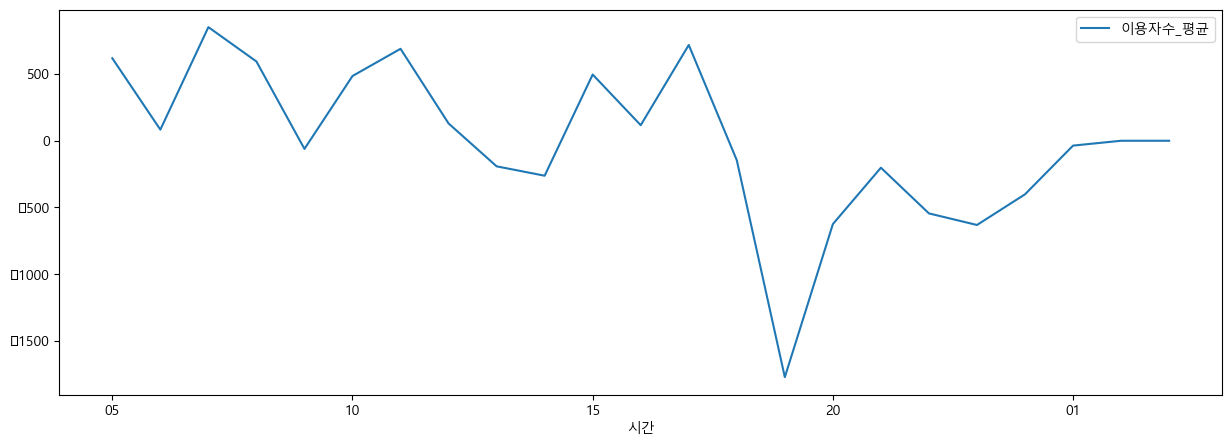

In [335]:
#1차 차분 데이터 diff1
dff1_서울역 = 서울역.diff().dropna()
dff1_서울역.plot(figsize=(15,5))

In [336]:
adf_test(dff1_서울역)

ADF Statistics: -2.971414
p-value: 0.037652
num of lags: 0.000000
num of observations: 22.000000
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


=> 1차 차분만으로 괜찮아 보임

In [337]:
model2_fit = pm.auto_arima(
    	    y=서울역.이용자수_평균, 
 	        d=1, 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model2_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=361.345, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=358.888, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=357.075, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=359.346, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=358.572, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=358.724, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=360.587, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=355.080, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=356.574, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=356.727, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=356.892, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.614 seconds
                               SARIMAX Results                                
Dep. Variable:           

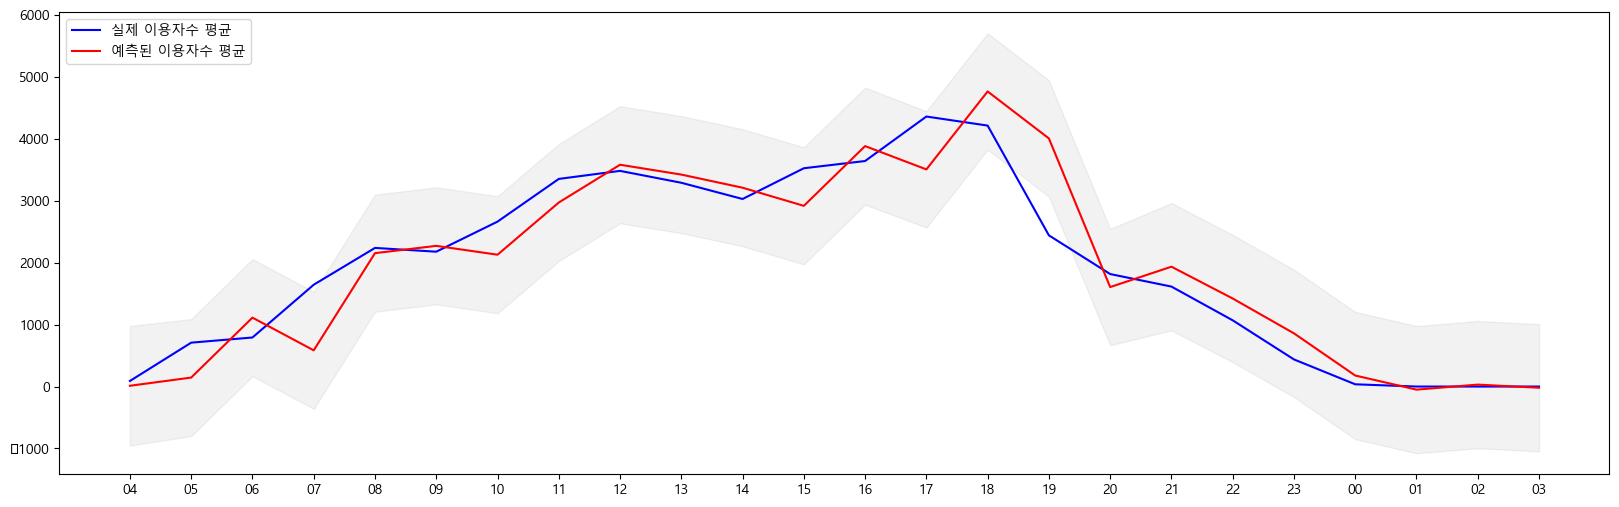

In [338]:
# Forecast 
fc2, upper2, lower2 = forecast(len(서울역), model2_fit, 서울역.index, data = 서울역['이용자수_평균'])
# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower2, index=서울역.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper2, index=서울역.index)  # 예측결과의 상한 바운드
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(서울역, c='b', label='실제 이용자수 평균')
plt.plot(fc2, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

In [339]:
fc2

시간
04     12.3921
05    144.8960
06   1112.2782
07    584.5167
08   2153.0022
09   2270.7767
10   2127.9903
11   2970.3231
12   3580.2163
13   3421.3936
14   3209.4861
15   2916.8242
16   3881.2403
17   3504.9694
18   4763.1016
19   4004.9385
20   1605.3628
21   1934.4957
22   1421.1843
23    858.6709
00    177.8133
01    -50.0539
02     31.2374
03    -19.5241
dtype: float64

In [340]:
pred(fc2)

,이용자수예측,비율
시간,,
04,12.3921,0.0003
05,144.8960,0.0031
06,1112.2782,0.0239
07,584.5167,0.0125
08,2153.0022,0.0462
09,2270.7767,0.0487
10,2127.9903,0.0456
11,2970.3231,0.0637
12,3580.2163,0.0768


### 잠실(송파구청) 시계열 분석 및 예측

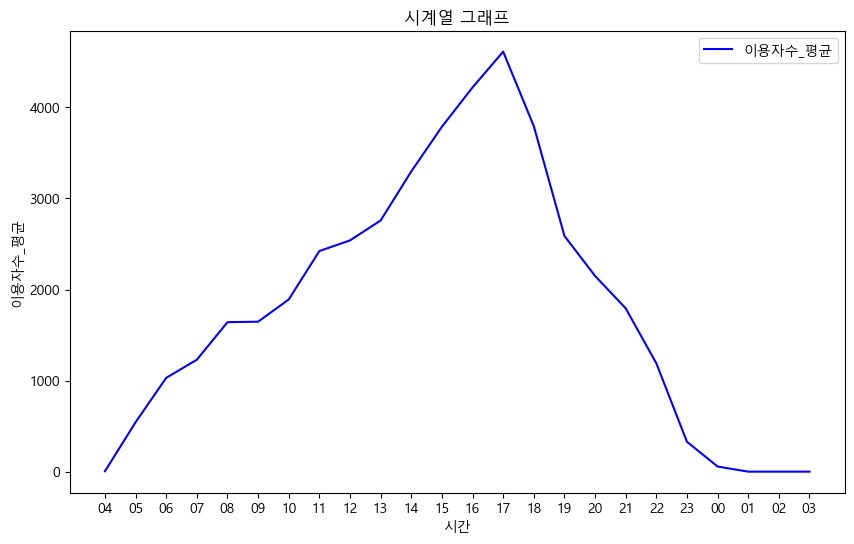

In [341]:
draw(잠실)

In [342]:
print('ADF TEST 결과')
adf_test(잠실)
잠실.index = 잠실['시간']
잠실.set_index('시간', inplace=True)

ADF TEST 결과
ADF Statistics: -2.075701
p-value: 0.254397
num of lags: 3.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


<AxesSubplot:xlabel='시간'>

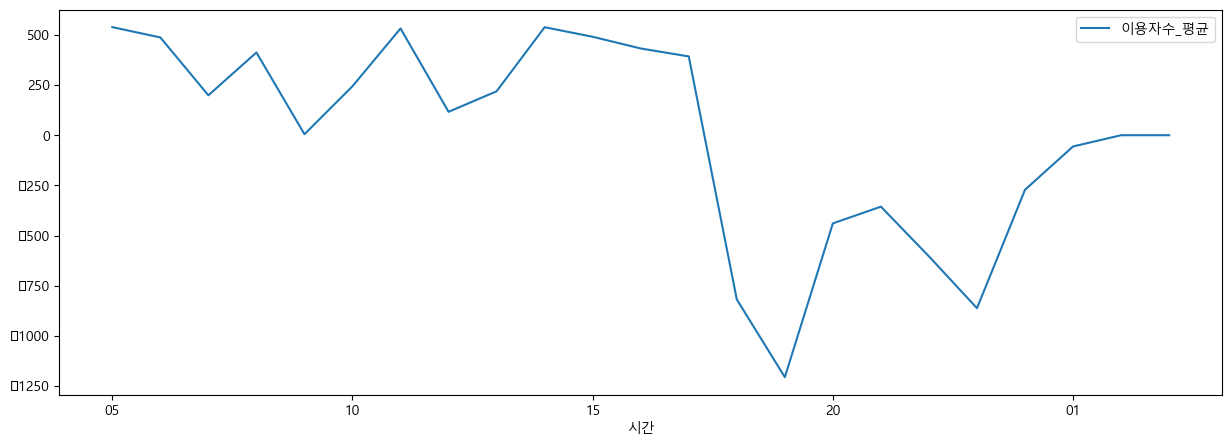

In [343]:
dff1_잠실 = 잠실.diff().dropna()
dff1_잠실.plot(figsize=(15,5))

In [344]:
adf_test(dff1_잠실)

ADF Statistics: -2.238302
p-value: 0.192639
num of lags: 1.000000
num of observations: 21.000000
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


<AxesSubplot:xlabel='시간'>

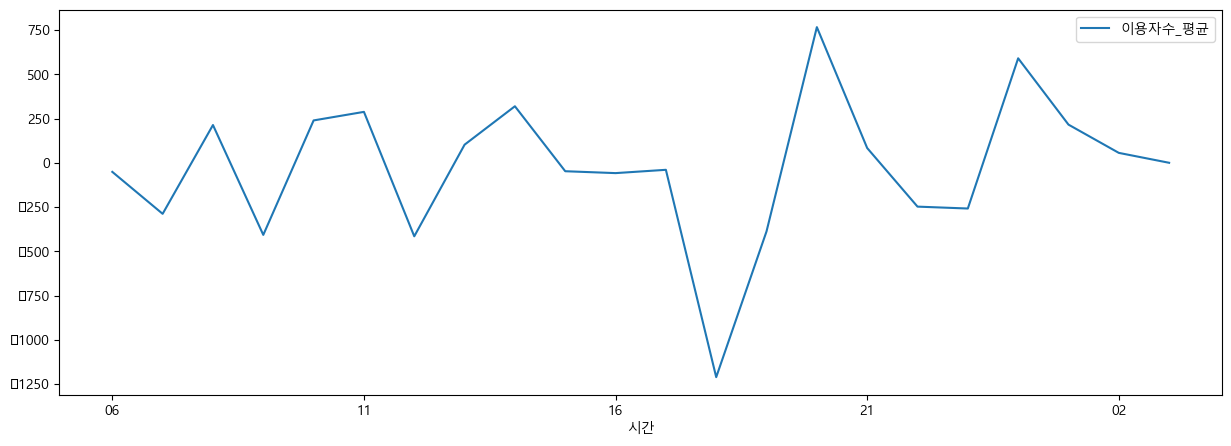

In [345]:
dff2_잠실 = dff1_잠실.diff().dropna()
dff2_잠실.plot(figsize=(15,5))

In [346]:
adf_test(dff2_잠실)

ADF Statistics: -4.620011
p-value: 0.000119
num of lags: 1.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


=> 2차 차분까지 진행해야 정상성 만족

In [347]:
model3_fit = pm.auto_arima(
    	    y=잠실.이용자수_평균, 
 	        d=2, 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model2_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=329.636, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=331.636, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=331.637, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=327.720, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.157 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -358.682
Date:                Fri, 24 Nov 2023   AIC                            721.365
Time:                        02:34:10   BIC                            725.065
Sample:                             0   HQIC                           722.757
                                 - 48                                         
Covari

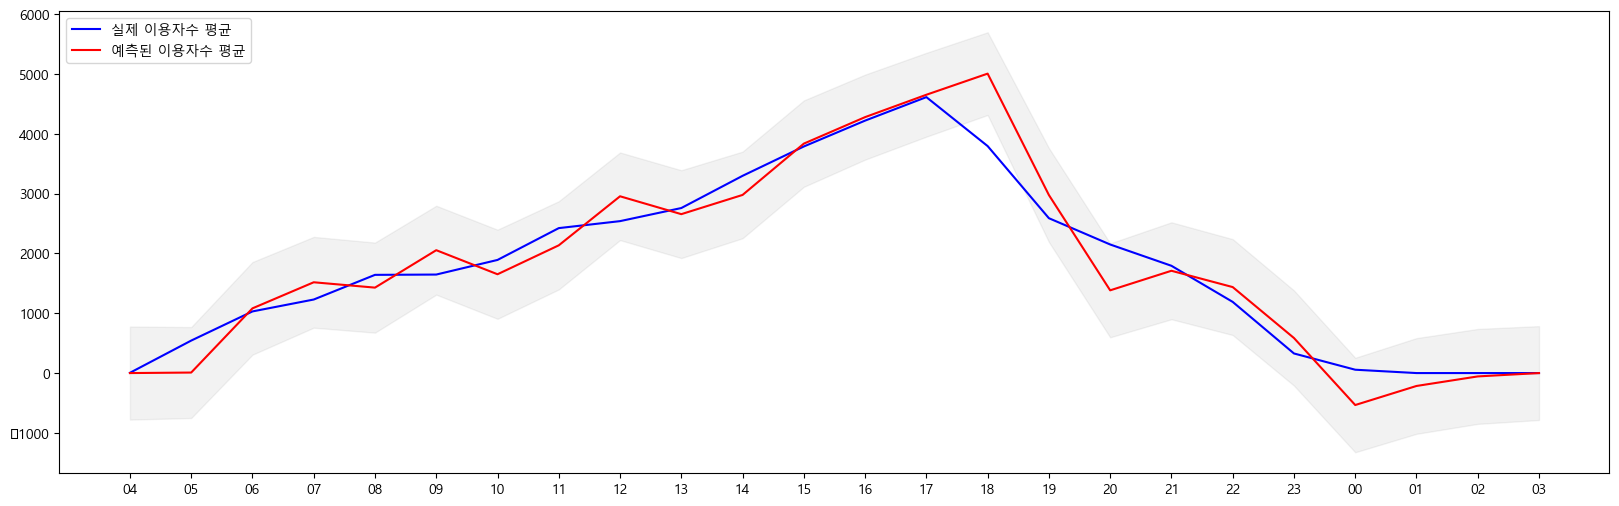

In [348]:
# Forecast 
fc3, upper3, lower3 = forecast(len(잠실), model3_fit, 잠실.index, data = 잠실['이용자수_평균'])
# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower3, index=잠실.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper3, index=잠실.index)  # 예측결과의 상한 바운드
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(잠실, c='b', label='실제 이용자수 평균')
plt.plot(fc3, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()
    

In [349]:
fc3

시간
04     -0.0000
05      8.6667
06   1081.6667
07   1517.6667
08   1428.3333
09   2054.0000
10   1651.6667
11   2135.3333
12   2955.0000
13   2656.3333
14   2977.6667
15   3835.3333
16   4278.3333
17   4652.3333
18   5005.3333
19   2976.0000
20   1383.0000
21   1710.0000
22   1437.3333
23    586.0000
00   -534.3333
01   -215.6667
02    -56.0000
03      0.0000
dtype: float64

In [350]:
pred(fc3)

,이용자수예측,비율
시간,,
04,-0.0000,-0.0000
05,8.6667,0.0002
06,1081.6667,0.0249
07,1517.6667,0.0349
08,1428.3333,0.0328
09,2054.0000,0.0472
10,1651.6667,0.0379
11,2135.3333,0.0491
12,2955.0000,0.0679


## 전체 이용자 평균으로 시계열 분석 및 예측 (정류장 통일)

In [351]:
average_time=average.drop(['정류장','합계'],axis=1)
average_time

,04,05,06,07,08,09,10,11,12,13,...,18,19,20,21,22,23,00,01,02,03
0,52.3333,276.0000,411.3333,639.3333,741.0000,780.6667,1068.3333,1137.0000,1181.0000,1111.0000,...,1215.0000,677.3333,478.3333,400.0000,341.0000,145.3333,24.6667,0.0000,0.0000,0.0000
1,28.6667,175.0000,287.3333,480.3333,405.6667,503.0000,678.6667,849.3333,1034.6667,1244.0000,...,3203.3333,1305.3333,883.3333,555.3333,367.3333,106.0000,14.3333,0.3333,0.0000,0.0000
2,38.0000,1591.6667,1454.3333,2391.6667,3239.0000,3115.0000,2765.0000,2510.3333,2714.3333,2499.3333,...,1498.0000,743.0000,532.6667,347.0000,243.3333,107.3333,12.6667,0.0000,0.0000,0.0000
3,6.0000,239.0000,577.3333,506.6667,618.0000,653.0000,1051.0000,1237.6667,1442.3333,1662.3333,...,2192.3333,1311.3333,1076.6667,1099.6667,749.0000,305.0000,65.0000,0.3333,0.0000,0.0000
4,2.0000,112.3333,182.3333,223.0000,191.3333,262.6667,325.3333,295.0000,259.3333,357.3333,...,689.0000,321.0000,289.3333,245.6667,138.3333,50.3333,8.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,7.3333,1254.6667,1317.6667,2033.3333,2437.3333,1910.3333,1926.0000,1904.3333,1846.0000,1533.3333,...,1112.0000,667.6667,509.0000,349.0000,229.0000,83.6667,9.6667,0.0000,0.0000,0.0000
237,11.0000,269.6667,476.6667,767.6667,871.0000,661.6667,476.0000,415.0000,455.0000,440.3333,...,244.3333,115.6667,99.6667,104.0000,36.6667,20.3333,5.3333,0.0000,0.0000,0.0000
238,5.6667,75.0000,96.6667,231.3333,325.0000,451.6667,707.0000,1144.3333,1609.3333,1967.3333,...,1807.6667,727.6667,604.0000,279.0000,176.6667,66.3333,5.3333,0.0000,0.0000,0.0000
239,0.0000,86.6667,231.6667,542.0000,544.6667,407.0000,349.0000,372.3333,460.6667,372.3333,...,303.0000,184.0000,139.6667,119.6667,64.0000,20.6667,2.6667,0.0000,0.0000,0.0000


In [352]:
average_time.loc['Mean']= average_time.mean()

In [353]:
user_avr=average_time.loc['Mean']


In [354]:
user_avr=pd.DataFrame(user_avr)

In [355]:
user_avr
user_avr.columns=['이용자수_평균']

In [356]:
adf_test(user_avr)

ADF Statistics: -0.854069
p-value: 0.802722
num of lags: 1.000000
num of observations: 22.000000
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


<AxesSubplot:>

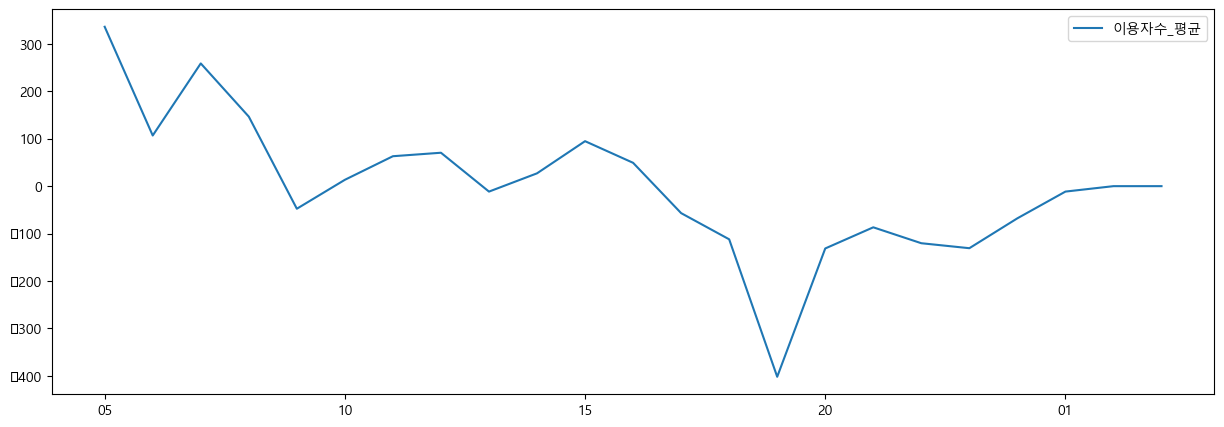

In [357]:
# 1차 차분 데이터 diff1
dff1_user = user_avr.diff().dropna()
dff1_user.plot(figsize=(15,5))

In [358]:
adf_test(dff1_user )

ADF Statistics: -3.053940
p-value: 0.030155
num of lags: 0.000000
num of observations: 22.000000
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


=> 1차 차분으로 정상성 만족

In [359]:
model4_fit = pm.auto_arima(
    	    y=user_avr.이용자수_평균, 
 	        d=1, 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model4_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=297.791, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=289.501, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=293.180, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.791, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=291.041, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=290.947, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=287.635, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=289.212, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=289.141, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=291.208, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=291.141, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.803 seconds
                               SARIMAX Results                                
Dep. Variable:           

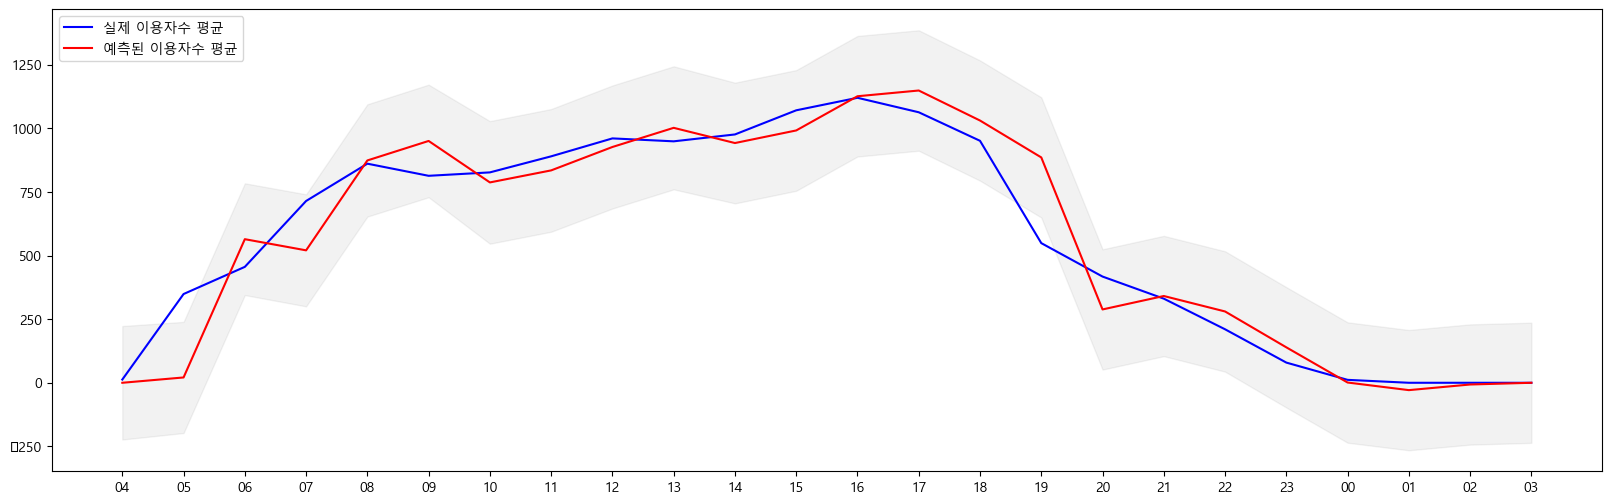

In [360]:
# Forecast 
fc4, upper4, lower4 = forecast(len(user_avr), model4_fit, user_avr.index, data = user_avr.이용자수_평균)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower4, index=user_avr.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper4, index=user_avr.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(user_avr, c='b', label='실제 이용자수 평균')
plt.plot(fc4, c='r',label='예측된 이용자수 평균')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

In [361]:
fc4

04     -0.0018
05     20.8984
06    564.1945
07    520.3377
08    873.5423
09    950.1495
10    787.1968
11    834.4812
12    926.4247
13   1001.6758
14    941.9319
15    991.4115
16   1125.7907
17   1148.3325
18   1030.3709
19    885.4150
20    288.1373
21    340.9260
22    280.1775
23    139.2284
00      0.9968
01    -28.9123
02     -6.7768
03     -0.0095
dtype: float64

In [362]:
pred(fc4)

,이용자수예측,비율
04,-0.0018,-0.0000
05,20.8984,0.0015
06,564.1945,0.0414
07,520.3377,0.0382
08,873.5423,0.0642
09,950.1495,0.0698
10,787.1968,0.0578
11,834.4812,0.0613
12,926.4247,0.0680
13,1001.6758,0.0736


#### 정류장 별로 시계열 분석- ARIMA